In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.models as models
import pandas as pd
from PIL import Image

In [1]:
# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),  # Normalize with CIFAR-100 mean and std
])

# Download the CIFAR-100 training dataset
train_dataset = datasets.CIFAR100(
    root='./data',       # Change this path if needed
    train=True,          # Set to True to download the training set
    download=True,       # Set to True to download if not already downloaded
    transform=transform  # Apply transformations
)

# Hyper-parameters
batch_size = 64
num_epochs = 10

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for batch processing
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,      # Batch size (you can modify this as needed)
    shuffle=True        # Shuffle data for training
)


NameError: name 'transforms' is not defined

Batch of images shape: torch.Size([64, 3, 32, 32])
Batch of labels: tensor([71, 18,  5, 20, 59, 73, 51, 50, 59, 27, 56, 51,  3, 74, 80, 24, 23, 13,
        27, 41, 46, 40,  1, 52, 91, 29, 56, 34,  6, 71, 81, 35, 77, 70, 96, 92,
        98,  1, 24, 53, 21, 57, 57, 12, 65,  2, 91, 73, 37, 41, 42, 29, 25, 81,
        79,  5, 39, 81, 19, 44, 86, 72, 62, 24])


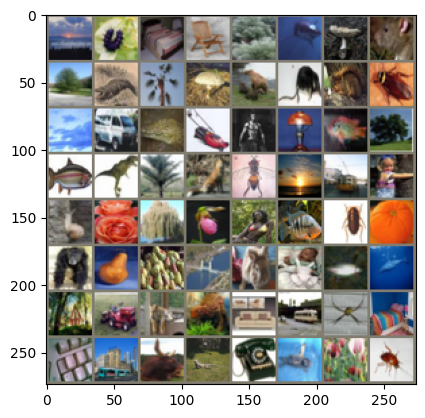

71 18 5 20 59 73 51 50


In [18]:
# Accessing one batch of images and labels
images, labels = next(iter(train_loader))
print(f"Batch of images shape: {images.shape}")  # Should output torch.Size([64, 3, 32, 32])
print(f"Batch of labels: {labels}")

# Function to show an image
def imshow(img):
    img = img * torch.tensor((0.2675, 0.2565, 0.2761)).view(3,1,1) + torch.tensor((0.5071, 0.4867, 0.4408)).view(3,1,1)  # Unnormalize
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))  # Convert from Tensor image
    plt.imshow(img)
    plt.show()

# Show images
import torchvision
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{labels[j].item()}' for j in range(8)))

In [19]:
model = torchvision.models.resnet18(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 100)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

dataset_sizes = len(train_dataset)
indices = list(range(dataset_sizes))
split = int(np.floor(0.2 * dataset_sizes))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)

c:\Users\athap\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\athap\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    model.train()
    overall_loss = 0
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        overall_loss += loss.item() * images.size(0)

    epoch_loss = overall_loss / len(train_loader.dataset)
    print(f'Training Loss: {epoch_loss}')

    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    accuracy = correct / total
    print(f'Validation Loss: {val_loss}, Accuracy: {accuracy}')

print('Finished Training')
torch.save(model.state_dict(), 'model.pth')

Epoch 1/20
Training Loss: 2.400459376373291
Validation Loss: 0.5107947035217285, Accuracy: 0.345
Epoch 2/20
Training Loss: 1.7595228330993653
Validation Loss: 0.44799868049621583, Accuracy: 0.411
Epoch 3/20
Training Loss: 1.4680723950195314
Validation Loss: 0.4100646961593628, Accuracy: 0.4542
Epoch 4/20
Training Loss: 1.2707410829925536
Validation Loss: 0.4072045265579224, Accuracy: 0.4625
Epoch 5/20


In [12]:
print("Generating predictions on test set")

test_df = pd.read_csv('./test.csv')

Generating predictions on test set


KeyboardInterrupt: 

In [ ]:
class CIFAR100TestDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.pixel_columns = [f'pixel_{i}' for i in range(1, 3073)]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        pixel_data = self.dataframe.iloc[idx][self.pixel_columns].values.astype(np.uint8)
        image = pixel_data.reshape(3, 32, 32)
        image = np.transpose(image, (1, 2, 0))
        img = Image.fromarray(image)
        if self.transform:
            img = self.transform(img)
        ID = int(self.dataframe.iloc[idx]['ID'])
        return img, ID

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408),
                         (0.2675, 0.2565, 0.2761)),
])

test_dataset = CIFAR100TestDataset(test_df, transform=test_transform)
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)


In [ ]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 100)
model.load_state_dict(torch.load('cifar100_resnet18.pth'))
model = model.to(device)
model.eval()

all_IDs = []
all_predictions = []

In [ ]:
all_IDs = []
all_predictions = []

with torch.no_grad():
    for images, IDs in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        preds = preds.cpu().numpy()
        IDs = IDs.numpy()
        all_IDs.extend(IDs)
        all_predictions.extend(preds)

submission_df = pd.DataFrame({
    'ID': all_IDs,
    'LABEL': all_predictions
})

submission_df = submission_df.sort_values(by='ID').reset_index(drop=True)

In [ ]:
submission_df.to_csv('submission.csv', index=False)
print('Submission file saved as submission.csv')